In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm


from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['mathtext.fontset'] = 'dejavuserif' 
rcParams['figure.figsize'] = (10, 7)
rcParams['figure.dpi'] = 300
rcParams['axes.grid'] = True
rcParams['font.size'] = 14
# rcParams

### Дифракция Френеля

In [5]:
z_0 = 45.1
wavelength = 546.1e-9
frensel = pd.DataFrame({'n':[1, 2, 3, 4, 5],
                        'z':[42.5, 43.4, 43.8, 44.1, 44.3]})
frensel.z = z_0 - frensel.z
frensel.n += 1

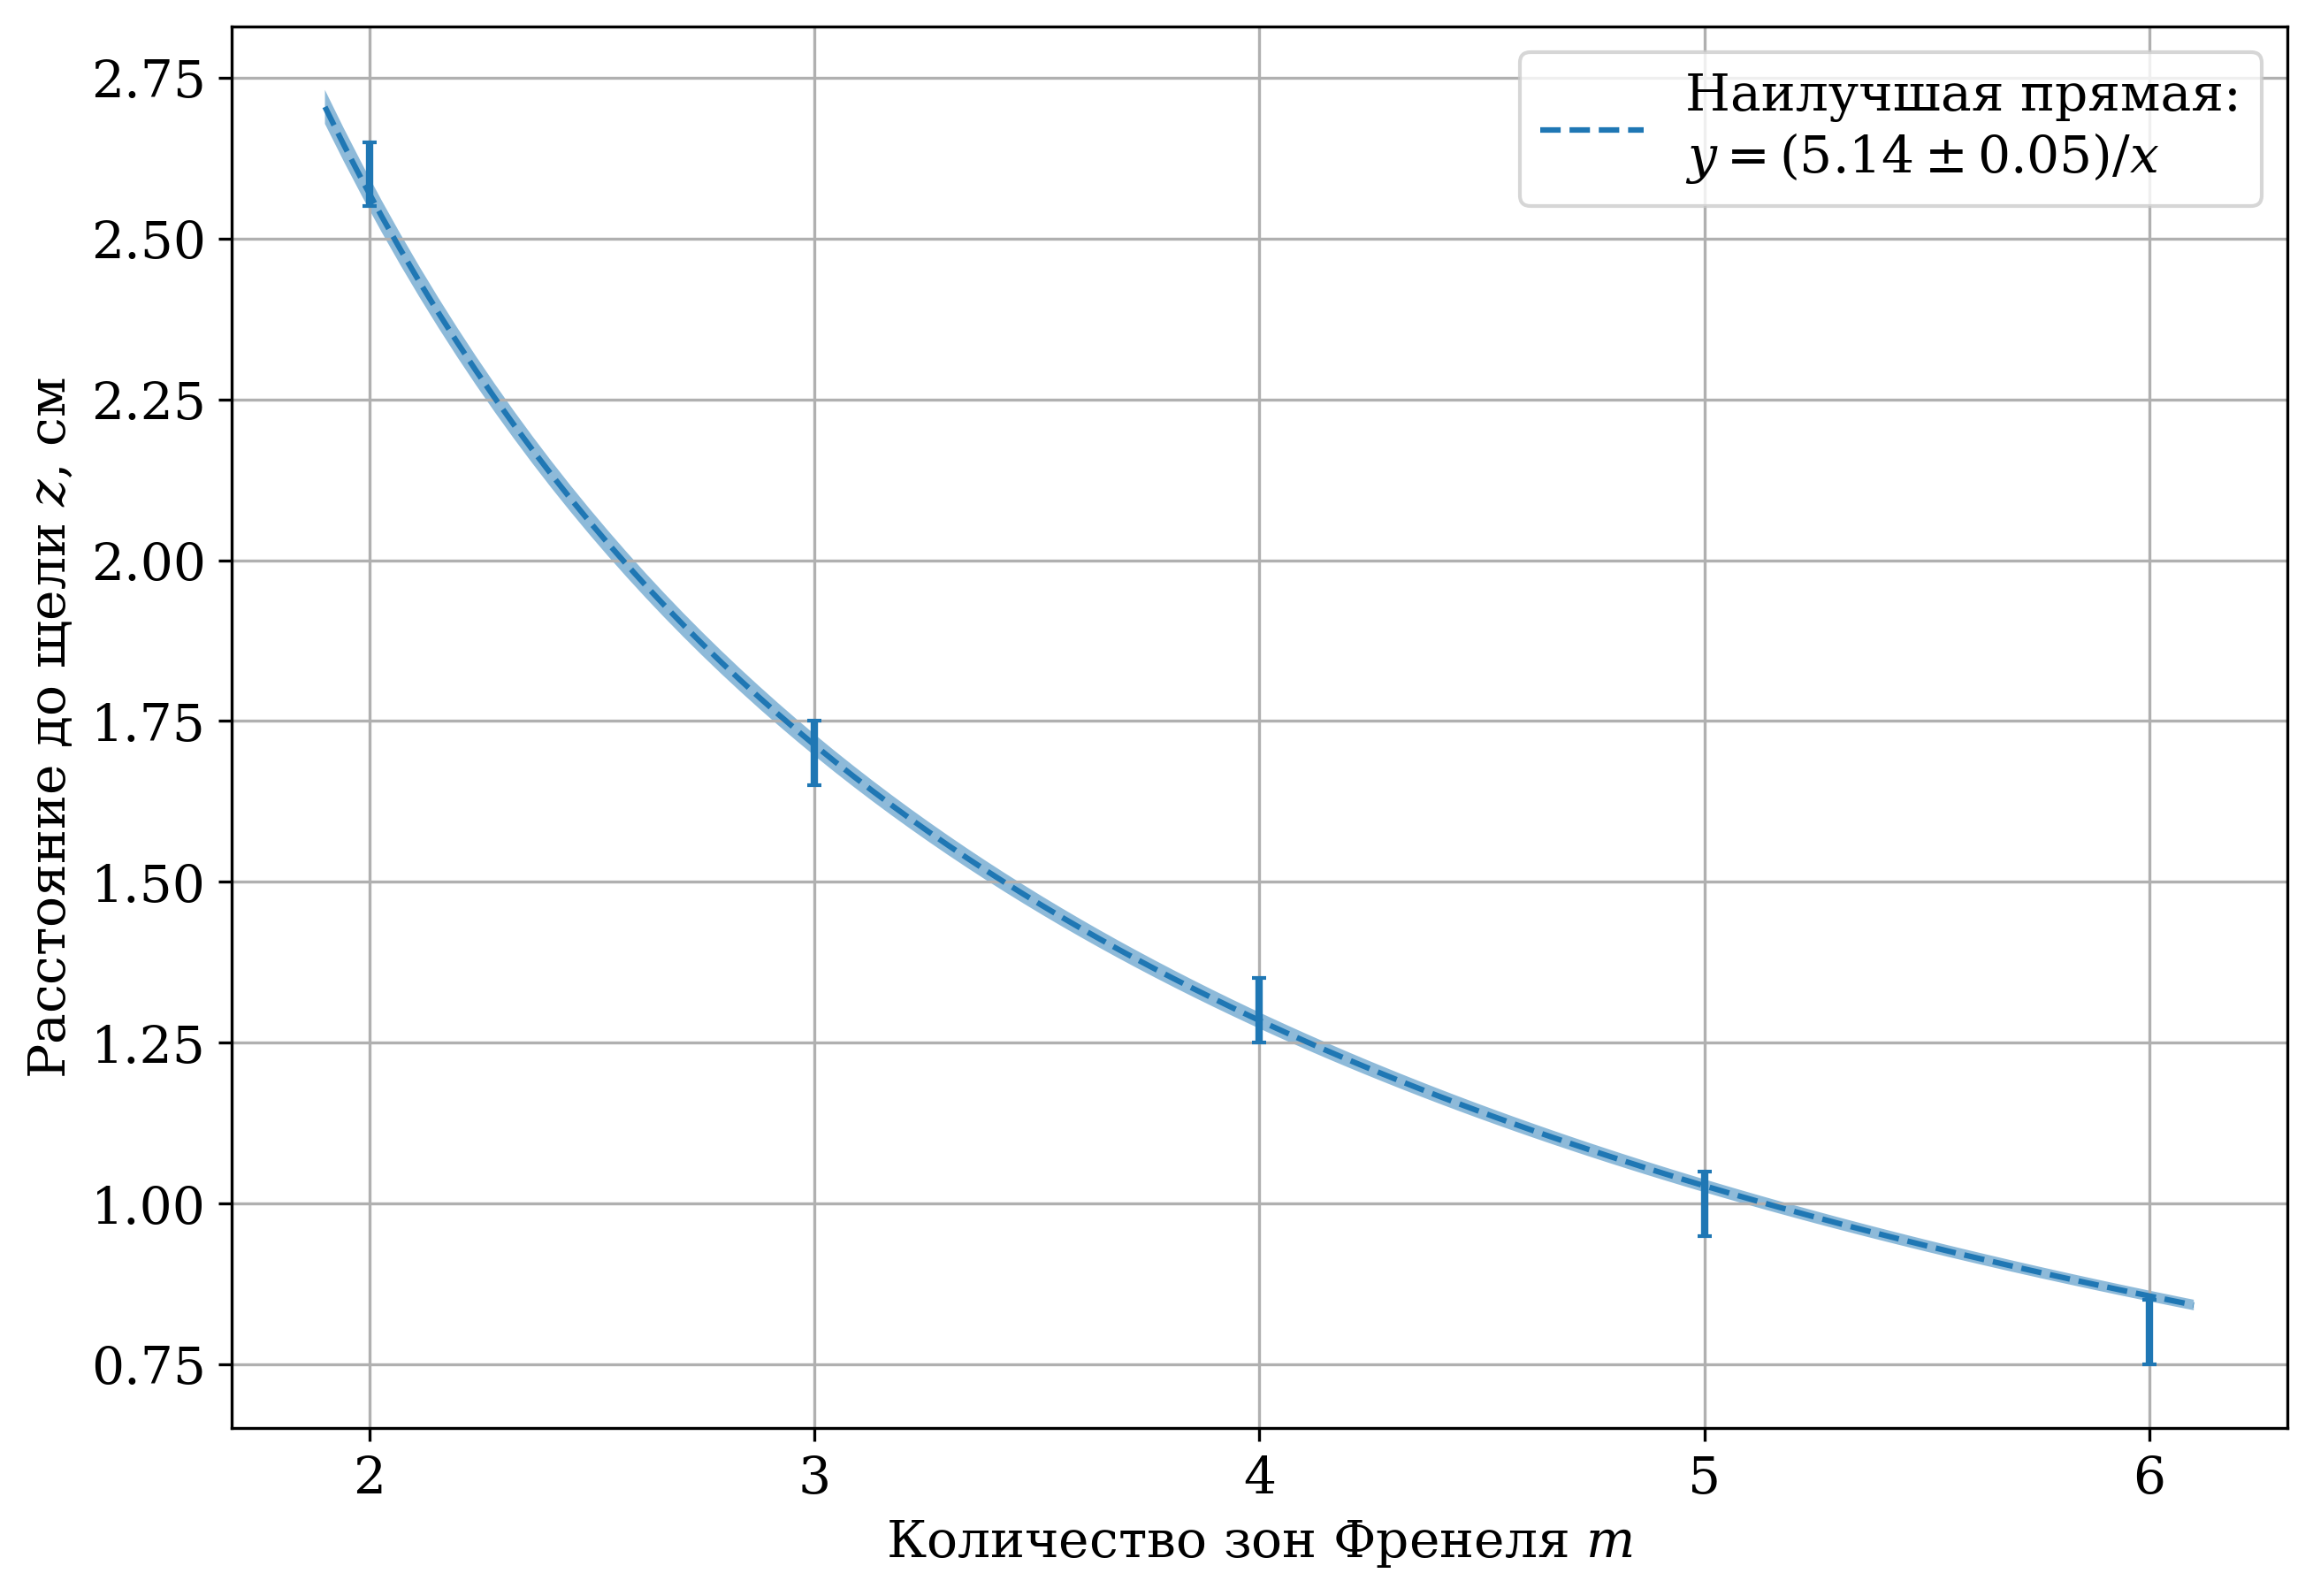

In [60]:
# plt.plot(np.log(frensel.n), np.log(frensel.z))
plt.errorbar(frensel.n, frensel.z, 0.05, 0, 'none', capsize=2, lw=2)

arg, cov = curve_fit(lambda x, a: a / x, frensel.n, frensel.z, sigma=[0.05]*5)

x = np.linspace(1.9, 6.1, 100)
plt.plot(x, arg[0] / x, lw=1.5, ls='--', label="Наилучшая прямая:\n"
                     "$y = ({arg:.2f} \pm {err:.2f}) / x$".format(arg=arg[0], err=np.sqrt(cov[0, 0])))
plt.fill_between(x, (arg[0] + 0.05) / x, (arg[0] - 0.05) / x, lw=0, alpha=0.5)

plt.legend()

plt.xlabel("Количество зон Френеля $m$")
plt.ylabel("Расстояние до щели $z$, см")

plt.savefig("exp1.pdf")

### Дифракция Фраунгофера 1

In [12]:
fraunhofer_1 = pd.DataFrame({'m':[1, -1, 2, -2, 3, -3, -4, +4],
                             'x':[2.24, 1.74, 2.48, 1.54, 2.72, 1.28, 1.08, 2.92]})

[0.23433333 2.        ] [0.00239985 0.00657225]


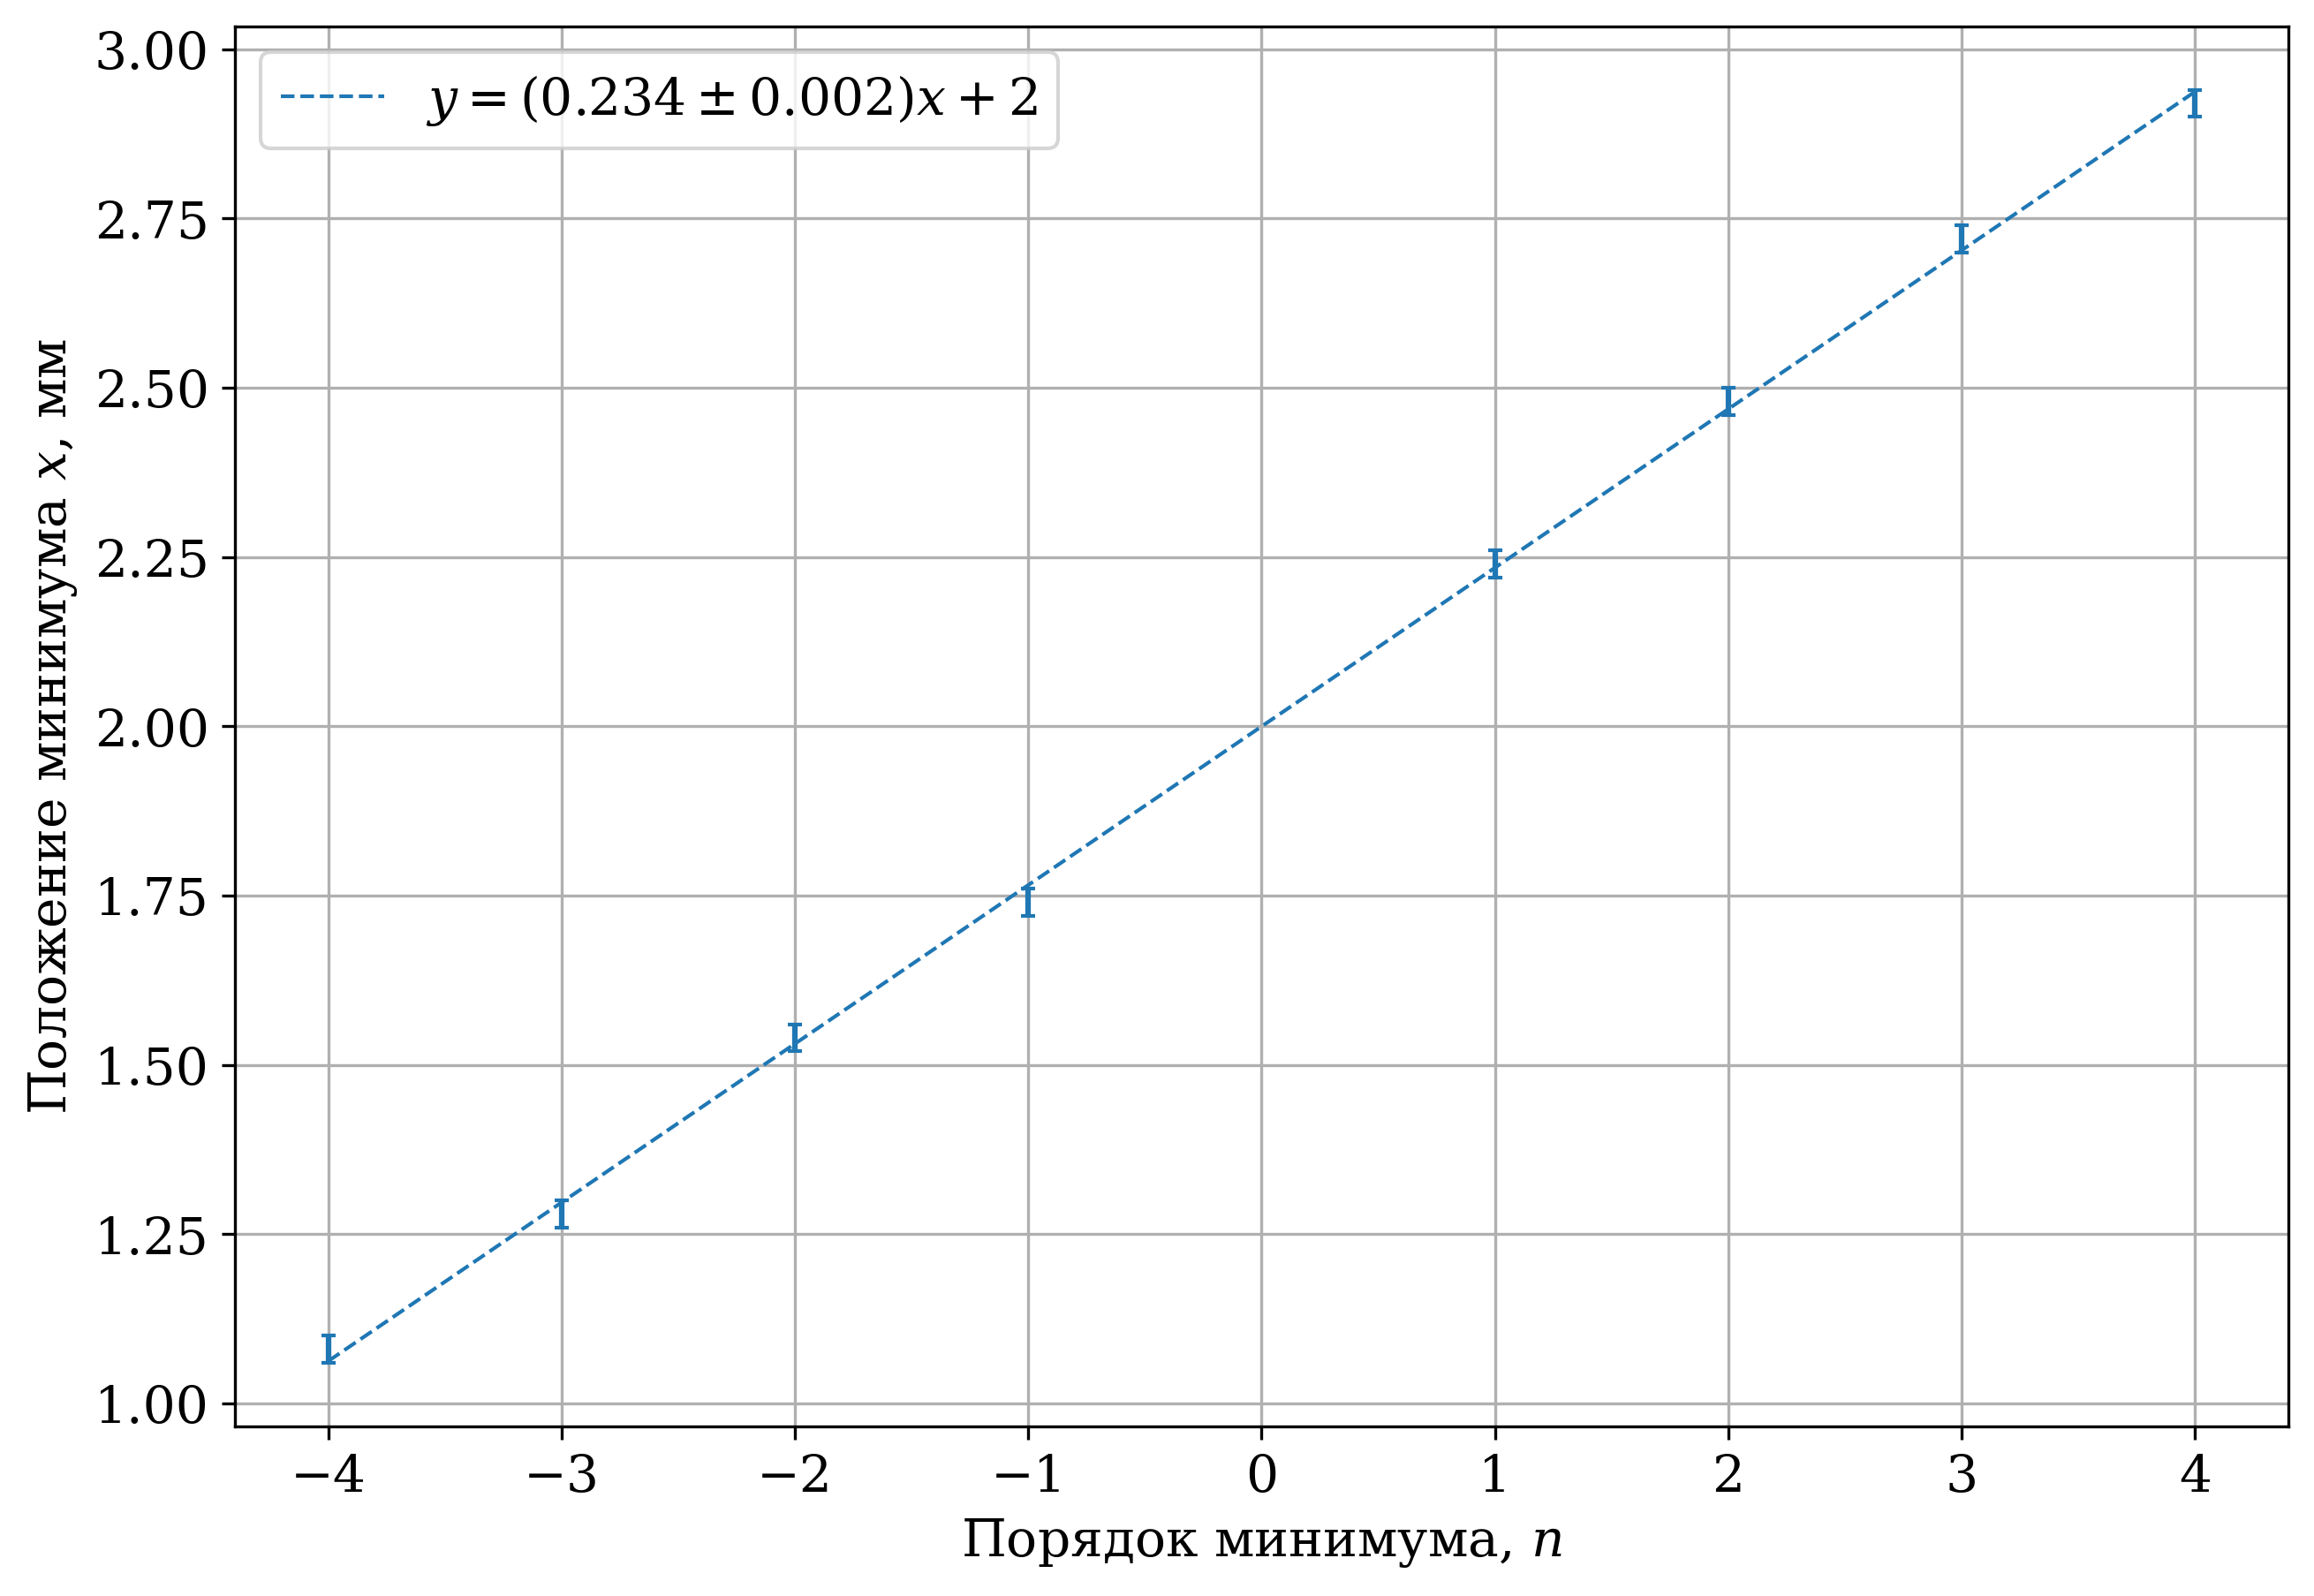

In [39]:
# plt.scatter(fraunhofer_1.m, fraunhofer_1.x)
plt.errorbar(fraunhofer_1.m, fraunhofer_1.x, 0.02, 0, 'none', capsize=2)


args, cov = np.polyfit(fraunhofer_1.m, fraunhofer_1.x, 1, cov=True)
f = np.poly1d(args)
err = np.sqrt(cov.diagonal())
print(args, err)

plt.plot(fraunhofer_1.m[-2:], f(fraunhofer_1.m[-2:]), lw=1, ls='--',
         label="$y = ({:.3f} \pm {:.3f}) x + 2$".format(args[0], err[0]))

plt.xlabel("Порядок минимума, $n$")
plt.ylabel("Положение минимума $x$, мм")
plt.legend()

plt.savefig("exp2.pdf")